In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load data
data = pd.concat([pd.read_csv('include/pisocompartido/processed/' +f) for f in os.listdir('include/pisocompartido/processed') if f.endswith('.csv')]).drop(columns='address')

# Room rental market analysis

This notebook presents a statistical analysis of room rentals in Barcelona. Our source is Piso Compartido, a widely used page to find shared apartments to live.

The data was extracted by using scrapping technics and can be checked how at: https://github.com/marianosin/barcelona_room_market

## Presenting dataset

The final dataset generated in previous steps contains:


### Basic information

- Post title: Basic information on what the offer is.
- Price: Published price to rent.
- Adress: Location of appartment (this variable is not shown for privacy concerns).
- Lattitude and longitude: Coordenates to locate in a map.
- Description: Contains a short text on what the offerent is looking for.

### Room information

- Room size: Category that classifies rooms in small, medium or large.
- Furnished: Is the room furnished? True or False.
- Private bathroom: Will the person have a pribvate bathroom?
- Individual or double room: Dummy variable to let the user know if it is just for one or two people.
- Room position: Is the room facing the street or internal. This variable contains external, internal or nan if no info is given.

### Flat information

- Rooms available: How many rooms the flat contains.
- Flat size: The total area of the flat in square meters.
- Number of bathroom: Quantity of bathroomd in the flat.
- Elevator: Dummy to indicate if building has an elevator.
- Pool: Categorization if a pool is available.
- Terrace: Indicates whether the property has a terrace or not.
- Washer machine: Indicates whether the property has a washing machine or not.
- Dryer machine: Indicates whether the property has a dryer machine or not.
- Air conditioning: Indicates whether the property has air conditioning or not.
- Heating: Indicates whether the property has a heating system or not.
- Internet: Indicates whether the property has internet access or not.
- tv: Indicates whether the property has a television or not.
- Storage: Indicates whether the property has storage space or not.
- Flat_condition: Describes the condition of the flat (e.g., new, good, needs renovation).

### Rules

- Pets_allowed: Indicates whether pets are allowed in the property or not.
- Couples_allowed: Indicates whether the property is suitable or allowed for couples or not.
- Smoking_allowed: Indicates whether smoking is allowed in the property or not.

In [3]:
data.head()

,title,price,latitude,longitude,description,room_size,furnished,private_bathroom,individual_or_double,room_position,...,heating,internet,tv,storage,flat_condition,pets_allowed,couples_allowed,smoking_allowed,original_file,date
0,habitación en alquiler en raval-santa rosa-saf...,450.0,41.446400,2.218479,alquilo una habitación individual para una per...,medium,False,False,True,exterior,...,False,False,False,False,good,NaN,NaN,False,pisocompartido_20240505_raw.json,2024-05-05
1,habitación en alquiler en la creu de barberà,300.0,41.523617,2.115299,somos una pareja que vivimos en un piso de tre...,medium,False,False,True,exterior,...,False,False,False,False,good,NaN,NaN,False,pisocompartido_20240505_raw.json,2024-05-05
2,habitación en alquiler en ca n''anglada,400.0,41.565895,2.030157,se alquila habitación nueva a estrenar totalme...,medium,False,False,True,exterior,...,False,False,False,False,refurbished,NaN,NaN,False,pisocompartido_20240505_raw.json,2024-05-05
3,habitación en alquiler en poble nou,450.0,41.732100,1.825010,"se alquilan habitaciones, son doble de más de ...",medium,True,False,True,exterior,...,False,False,False,False,NaN,NaN,NaN,False,pisocompartido_20240505_raw.json,2024-05-05
4,habitación en alquiler en sant cosme-la granja,450.0,41.316055,2.083031,habitación doble luminosa disponible a partir ...,medium,False,False,True,exterior,...,False,False,False,False,refurbished,NaN,NaN,False,pisocompartido_20240505_raw.json,2024-05-05


In [30]:
# As defined in previous steps, nan mean not defined or not available so we will replace it with 'not defined'
data = data.fillna('not defined')

In [4]:
print(' This dataset contains {} datapints and {} variables'.format(data.shape[0], data.shape[1]))

 This dataset contains 566 datapints and 29 variables


## Description of variables:

In [5]:
print('Cuantity of datapionts: {}'.format(data.shape[0]))
print(' Price main statistics: \n{}'.format(data['price'].describe()))

Cuantity of datapionts: 566
 Price main statistics: 
count    562.000000
mean     500.322064
std      140.790503
min        1.000000
25%      400.000000
50%      470.000000
75%      570.000000
max      950.000000
Name: price, dtype: float64


In [6]:
# Removing rows with no price information
data = data.dropna(subset=['price'])

### Price distribution

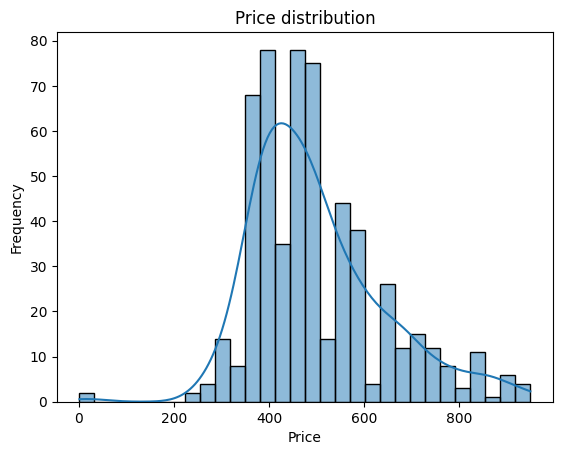

In [7]:
# Histogram of price distribution
# Title: Price distribution
# X-axis label: Price
# Y-axis label: Frequency
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Price distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Questions on data:

This sections will ask a few questions on how the market is offering.

### How many roons are in each room size category and how does its prices beheave?

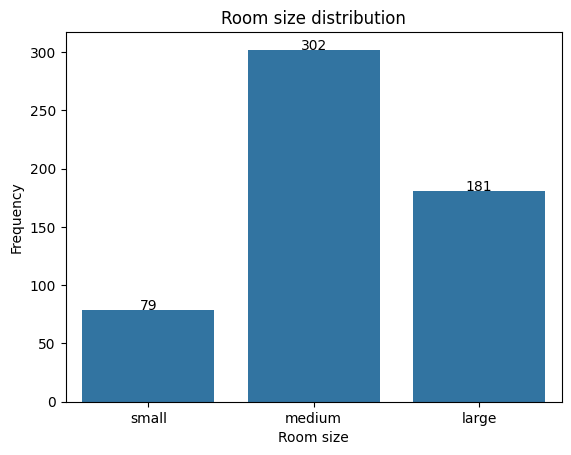

In [8]:
# How many rooms are in each category of room size?
# Title: Room size distribution
# X-axis label: Room size
# Y-axis label: Frequency
# Set order of category in graph as: small, medium, large
# Place number of rooms as label on top of bars ordered as in the graph
sns.countplot(x = data['room_size'], order=['small', 'medium', 'large'])
values = data['room_size'].value_counts()[['small', 'medium', 'large']].values
for i in range(3):
    if i == 0:
        plt.text(i, values[0], values[0], ha='center')
    elif i == 1:
        plt.text(i, values[1], values[1], ha='center')
    elif i == 2:
        plt.text(i, values[2], values[2], ha='center')
plt.title('Room size distribution')
plt.xlabel('Room size')
plt.ylabel('Frequency')
plt.show()

Now we will see how prices behave for each category:

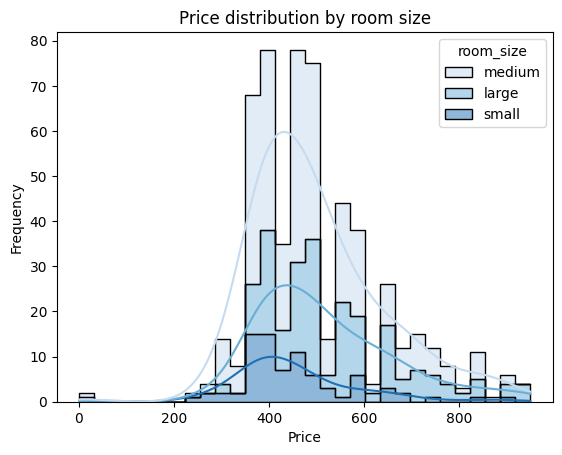

In [9]:
# How is price distributed in each category of room size?
# Title: Price distribution by room size
# X-axis label: Price
# Y-axis label: Frequency
# Set order of category in graph as: small, medium, large
# Set color of bars as blue
sns.histplot(data, x='price', hue='room_size', bins=30, kde=True, palette='Blues', multiple='stack', element='step')
plt.title('Price distribution by room size')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [10]:
# Description of price mean, median and standard deviation for each category of room size, including quartiles
# Title: Price statistics by room size
# X-axis label: Room size
# Y-axis label: Price
# Set order of category in graph as: small, medium, large
# Set color of bars as blue
# Place mean, median, standard deviation and quartiles as label on top of bars ordered as in the graph
print('''
    Small room size:
    Mean: {}
    Median: {}  
    Standard deviation: {}
    Medium room size:
    Mean: {}
    Median: {}
    Standard deviation: {}
    Large room size:
    Mean: {}
    Median: {}
    Standard deviation: {}
    '''.format(data[data['room_size'] == 'small']['price'].mean(),
               data[data['room_size'] == 'small']['price'].median(),
               data[data['room_size'] == 'small']['price'].std(),
               data[data['room_size'] == 'medium']['price'].mean(),
               data[data['room_size'] == 'medium']['price'].median(),
               data[data['room_size'] == 'medium']['price'].std(),
               data[data['room_size'] == 'large']['price'].mean(),
               data[data['room_size'] == 'large']['price'].median(),
               data[data['room_size'] == 'large']['price'].std()))


    Small room size:
    Mean: 454.9873417721519
    Median: 430.0  
    Standard deviation: 123.19938953300365
    Medium room size:
    Mean: 486.7450331125828
    Median: 450.0
    Standard deviation: 133.74698888217532
    Large room size:
    Mean: 542.7624309392265
    Median: 500.0
    Standard deviation: 149.21682181998685
    


As seen above, it seams that as the larger the room is, greater is its price standard desviation. This means that user can find a grater variety of prices when she is looking for larger rooms.

## Furnished and not furnished

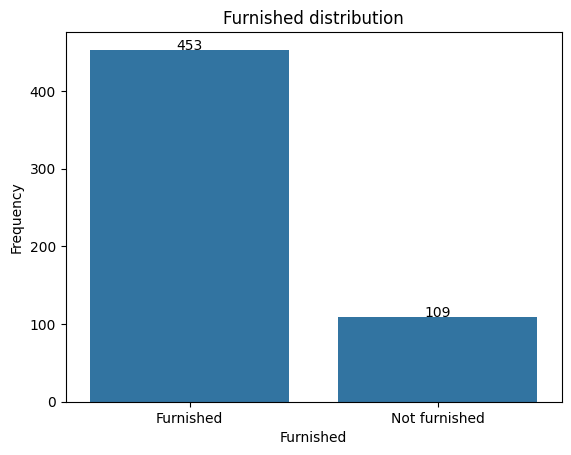

In [11]:
data['furnished'] = data['furnished'].map({True: 'Furnished', False: 'Not furnished'})

# How many rooms are in each category of furnished?
# Title: Furnished distribution
# X-axis label: Furnished
# Y-axis label: Frequency
# Place number of rooms as label on top of bars ordered as in the graph
sns.countplot(x = data['furnished'], order=['Furnished', 'Not furnished'])
values = data['furnished'].value_counts().values
for i in range(2):
    plt.text(i, values[i], values[i], ha='center')
plt.title('Furnished distribution')
plt.xlabel('Furnished')
plt.ylabel('Frequency')
plt.show()


### How much more expensive is a room if it comes furnished?

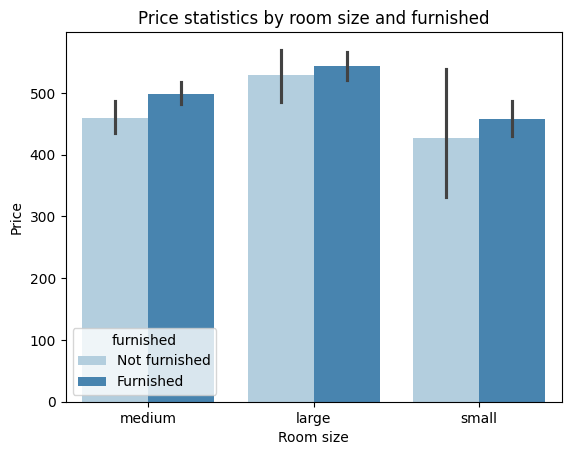

In [12]:
# Calculate mean prices of rooms based in room size and if it is furnished or not
# Title: Price statistics by room size and furnished
# X-axis label: Room size
# Y-axis label: Price
# Set order of category in graph as: small, medium, large
# Set color of bars as blue
# Place mean price as label on top of bars ordered as in the graph
# Set hue as furnished
# map True as 'Furnished' and False as 'Not furnished'

sns.barplot(x='room_size', y='price', hue='furnished', data=data, palette='Blues')
plt.title('Price statistics by room size and furnished')
plt.xlabel('Room size')
plt.ylabel('Price')
plt.show()

As price difference is not significant, it seems that for a small difference the user could get a furnished room to rent.

In [13]:
avg_roomsize_furnished = data.groupby(['room_size', 'furnished'])['price'].mean().unstack()
avg_roomsize_furnished['(%) difference'] = ((avg_roomsize_furnished['Furnished'] - avg_roomsize_furnished['Not furnished']) / avg_roomsize_furnished['Not furnished']) * 100
avg_roomsize_furnished.index.name = 'Room size'
avg_roomsize_furnished.round(2)

furnished,Furnished,Not furnished,(%) difference
Room size,,,
large,543.54,529.50,2.65
medium,498.79,459.67,8.51
small,457.25,427.50,6.96


### Room position, is it an accurate information?

In [28]:
data['room_position'].fillna('Not defined').value_counts()

room_position
exterior       468
Not defined     93
interior         1
Name: count, dtype: int64

<Axes: xlabel='room_position'>

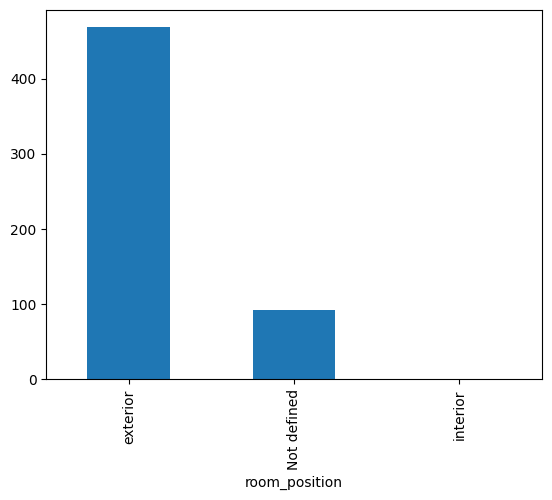

In [24]:
data['room_position'].fillna('Not defined').value_counts().plot(kind='bar')

Most post declare a exterior room: 468 out of 562. There are no interior rooms while some are not specifield.

### Is smoking an issue to find a room?

This question tries to answer what they declare before people ask. Do people care more about smoking than if pets are allowed?

In [36]:
# Group by rules and count how many rooms are in each category fillining nan as not defined
# Building table
pd.DataFrame(data['smoking_allowed'].value_counts())

,count
smoking_allowed,
False,525
True,37
